In [2]:
import pandas as pd
import yfinance as yf
import plotly.express as px
from datetime import datetime
import numpy as np


In [3]:
start_date = datetime.now() - pd.DateOffset(months=3)
end_date = datetime.now()


In [6]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']


In [8]:
df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)
df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])

df = df.reset_index() # we have to reset index 

print(df.head(100))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
   Ticker       Date        Open        High         Low       Close  \
0    AAPL 2024-04-01  171.190002  171.250000  169.479996  170.029999   
1    AAPL 2024-04-02  169.080002  169.339996  168.229996  168.839996   
2    AAPL 2024-04-03  168.789993  170.679993  168.580002  169.649994   
3    AAPL 2024-04-04  170.289993  171.919998  168.820007  168.820007   
4    AAPL 2024-04-05  169.589996  170.389999  168.949997  169.580002   
..    ...        ...         ...         ...         ...         ...   
95   MSFT 2024-05-15  417.899994  423.809998  417.269989  423.079987   
96   MSFT 2024-05-16  421.799988  425.420013  420.350006  420.989990   
97   MSFT 2024-05-17  422.540009  422.920013  418.029999  420.209991   
98  

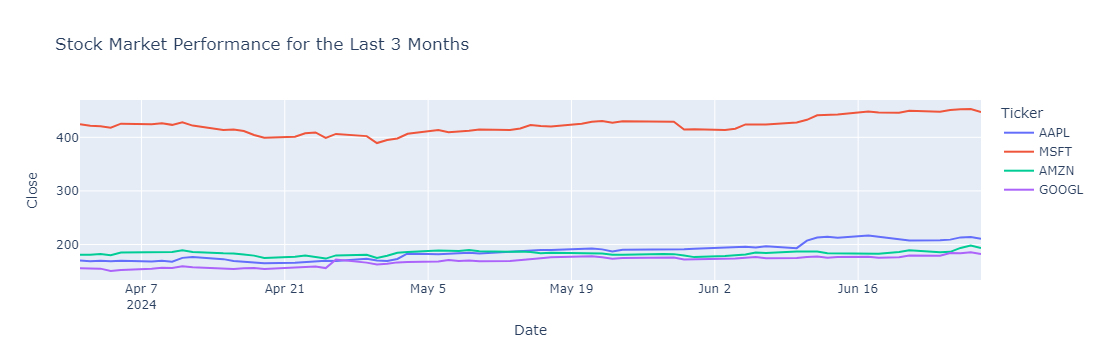

In [26]:
fig = px.line(df, x= 'Date',
              y='Close',
              color='Ticker',
              title="Stock Market Performance for the Last 3 Months")
fig.show()


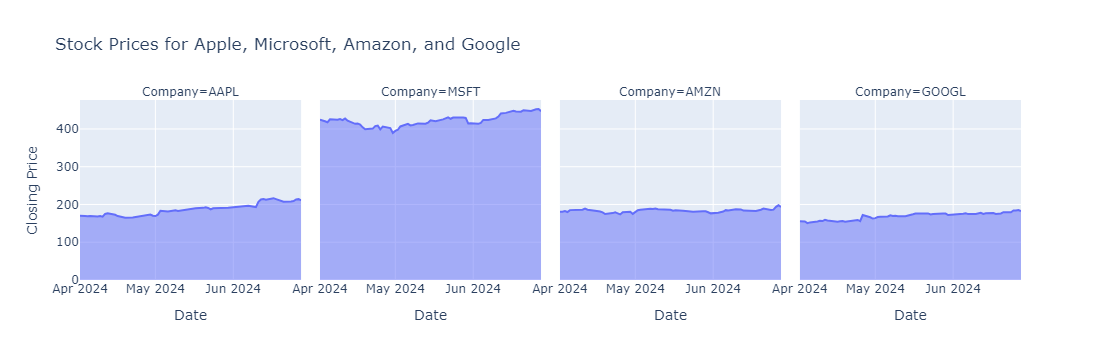

In [12]:
fig = px.area(df, x='Date', y='Close', 
              facet_col='Ticker',
              labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
              title='Stock Prices for Apple, Microsoft, Amazon, and Google')
fig.show()

In [18]:
df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA30'] = df.groupby('Ticker')['Close'].rolling(window=30).mean().reset_index(0, drop=True)

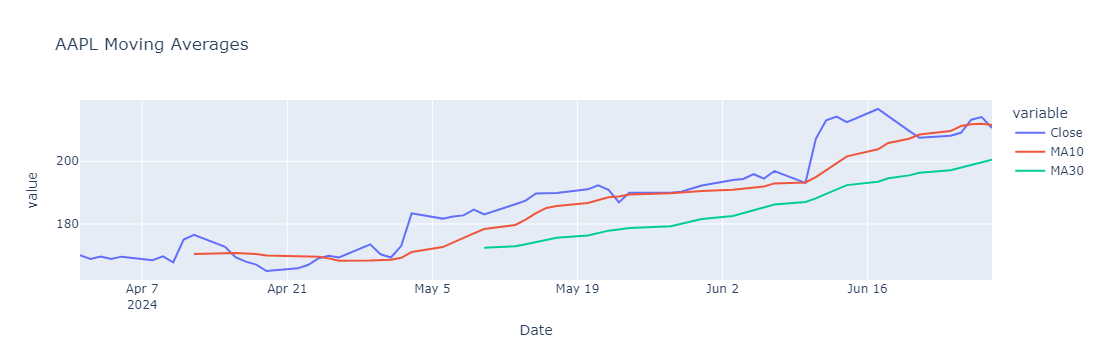

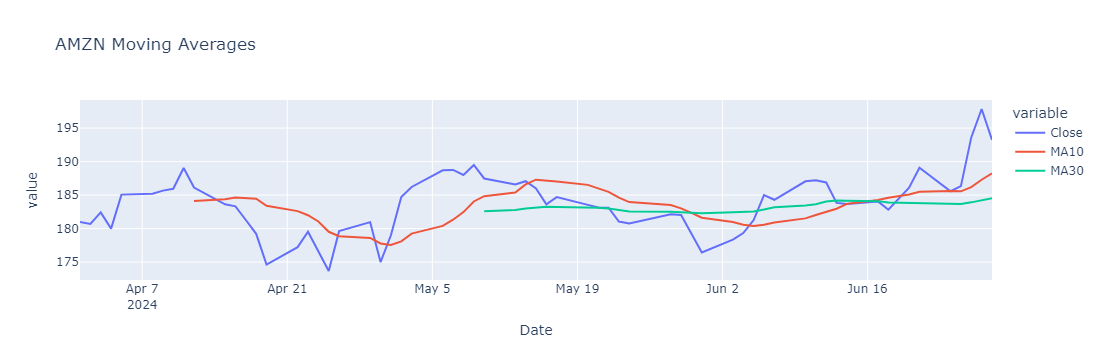

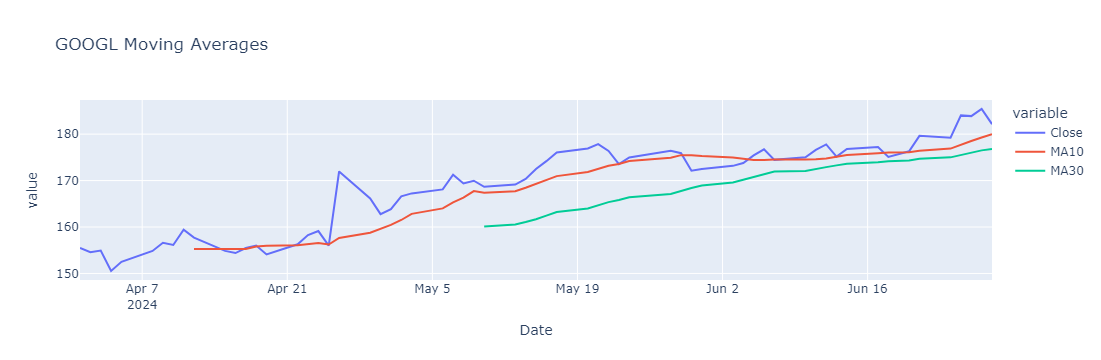

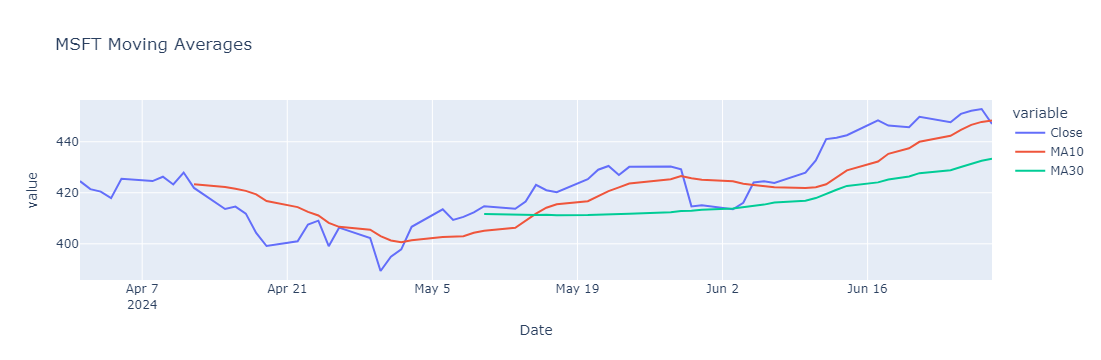

In [20]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA30'],
                  title=f"{ticker} Moving Averages")
    fig.show()

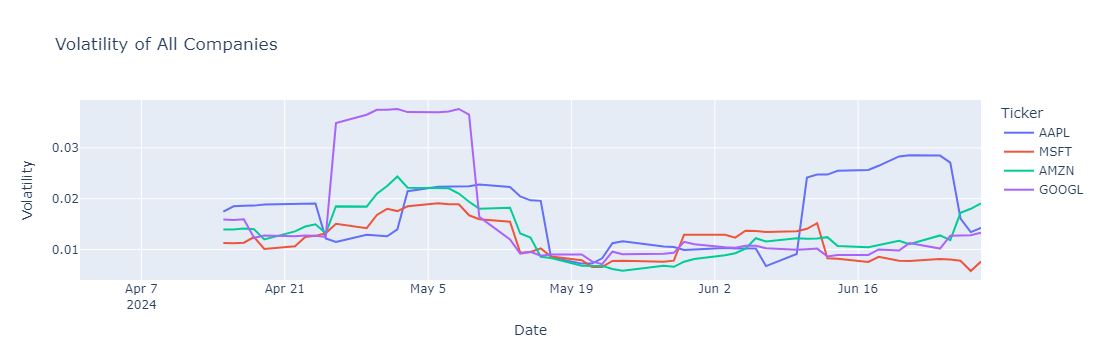

In [22]:
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility',
              color='Ticker',
              title='Volatility of All Companies')
fig.show()

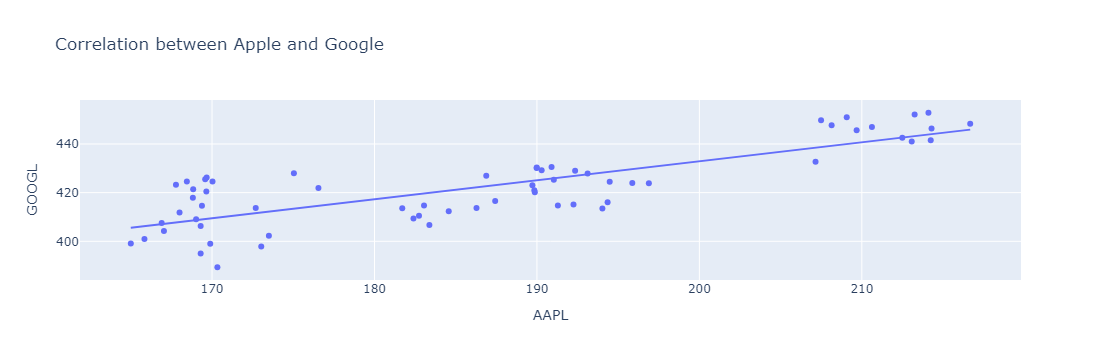

In [24]:
# create a DataFrame with the stock prices of Apple and Google
apple = df.loc[df['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
google = df.loc[df['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'GOOGL'})
df_corr = pd.merge(apple, google, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x='AAPL', y='GOOGL',
                 trendline='ols',
                 title='Correlation between Apple and Google')
fig.show()